In [1]:
import pandas as pd

classify = pd.read_csv('data/classify_time.csv')
print(classify.head())

   mm_yyyy  num_all_pdfs  time_contratacion  num_contratacion_pdfs  \
0  01-2016          3785         268.772516                   1394   
1  02-2016          5437        1237.349596                   1468   
2  03-2016          5804         206.024476                   1555   
3  04-2016          6908         228.959492                   2038   
4  05-2016          7266         300.628599                   1876   

   time_anuncio  num_anuncio_pdfs  time_formalizacion  num_formalizacion_pdfs  \
0     23.742939               205           20.309512                     536   
1     23.235818               152           20.825374                     507   
2     25.503661               118           23.852323                     415   
3     34.000661               206           31.081802                     516   
4     30.424339               191           27.891502                     435   

        execution_date  
0  2024-06-12 10:30:36  
1  2024-06-12 12:48:10  
2  2024-06-12 15:

In [2]:
# Sum column num_formalizacion_pdfs
print(classify['num_formalizacion_pdfs'].sum())

18976


In [3]:
import json
with open('data/mm_yyyy_size.json', 'r') as f:
    data = json.load(f)


In [6]:
# Sum all the sizes
total_size = 0
for mm_yyyy, size in data.items():
    total_size += size

In [7]:
total_size

300

In [8]:
with open("data/mm_yyyy_sampled_files.json", "r") as f:
    data = json.load(f)

In [9]:
total_num_files = 0
for mm_yyyy, files in data.items():
    total_num_files += len(files)
print(total_num_files)

300


In [7]:
import pandas as pd
# Read file comparison.csv
comparison = pd.read_csv('comparison.csv')
print(comparison.head())

                   pdf  mm_yyyy  \
0  BOE-B-2017-3514.pdf  01-2017   
1   BOE-B-2017-240.pdf  01-2017   
2  BOE-B-2017-2859.pdf  01-2017   
3   BOE-B-2017-470.pdf  01-2017   
4  BOE-B-2017-4174.pdf  01-2017   

                                             company      amount currency  \
0                 Alavés Montajes y Realización S.L.  1016400.00    euros   
1      International Business Machines S.A. (I.B.M.)  3921166.68    euros   
2  Integra Mantenimiento Gestión y Servicios Inte...   440618.45    euros   
3                                  Teknoservice S.L.  1011150.00    euros   
4                              Econocom Osiatis S.A.   360000.00    euros   

                                        adjudicadora                    tipo  \
0                     Agència Valenciana del Turisme          Contrato Mixto   
1                          Diputación Foral de Álava  Contrato de suministro   
2  Ayuntamiento de Madrid. Área de Gobierno de Eq...               Servicios   
3  Con

In [4]:
# Check occurrences of pdfs
print(comparison['pdf'].value_counts())

pdf
BOE-B-2017-3514.pdf     2
BOE-B-2017-30150.pdf    2
BOE-B-2017-23566.pdf    2
BOE-B-2017-21753.pdf    2
BOE-B-2017-24124.pdf    2
                       ..
BOE-B-2017-44452.pdf    1
BOE-B-2017-45962.pdf    1
BOE-B-2017-41644.pdf    1
BOE-B-2017-43105.pdf    1
BOE-B-2017-43714.pdf    1
Name: count, Length: 165, dtype: int64


In [10]:
# mm_yyyy=01-2017
jan_2017 = comparison[comparison['mm_yyyy'] == '01-2017']

In [11]:
jan_2017['pdf'].value_counts()

pdf
BOE-B-2017-3514.pdf    2
BOE-B-2017-240.pdf     2
BOE-B-2017-2289.pdf    2
BOE-B-2017-5044.pdf    2
BOE-B-2017-5466.pdf    2
BOE-B-2017-2714.pdf    2
BOE-B-2017-5739.pdf    2
BOE-B-2017-491.pdf     2
BOE-B-2017-5482.pdf    2
BOE-B-2017-4505.pdf    2
BOE-B-2017-4312.pdf    2
BOE-B-2017-1058.pdf    2
BOE-B-2017-4278.pdf    2
BOE-B-2017-1328.pdf    2
BOE-B-2017-3566.pdf    2
BOE-B-2017-4410.pdf    2
BOE-B-2017-2564.pdf    2
BOE-B-2017-5745.pdf    2
BOE-B-2017-5435.pdf    2
BOE-B-2017-3475.pdf    2
BOE-B-2017-5460.pdf    2
BOE-B-2017-4398.pdf    2
BOE-B-2017-3892.pdf    2
BOE-B-2017-2824.pdf    2
BOE-B-2017-4174.pdf    2
BOE-B-2017-470.pdf     2
BOE-B-2017-2859.pdf    2
BOE-B-2017-3907.pdf    2
Name: count, dtype: int64

In [18]:
# Compare time depending on model
jan_2017.groupby('model')['time'].mean()

model
llama3    392.487500
phi3      262.702857
Name: time, dtype: float64

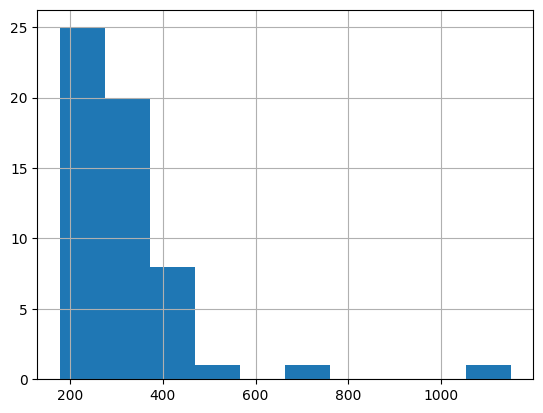

In [19]:
    # Graph distribution of time
import matplotlib.pyplot as plt
jan_2017['time'].hist()
plt.show()

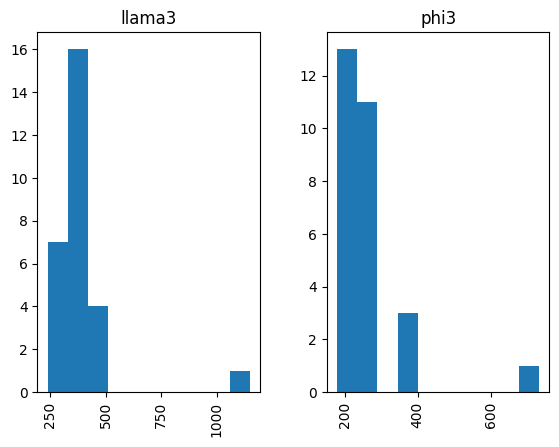

In [20]:
# Graph distribution of time depending on model
jan_2017.hist(column='time', by='model')
plt.show()

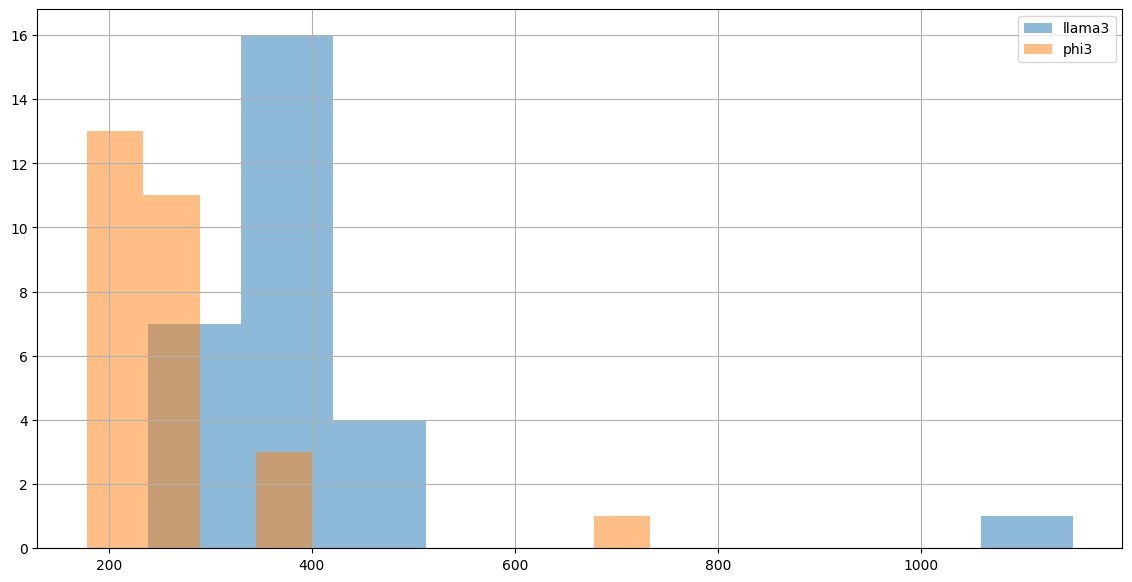

In [21]:
# Graph distribution of time depending on model but in the same graph different colors
plt.figure(figsize=(14, 7))
for model, group in jan_2017.groupby('model'):
    group['time'].hist(label=model, alpha=0.5)
plt.legend()
plt.show()

In [24]:
# Remove outliers and do the same
jan_2017 = jan_2017[jan_2017['time'] < 800]

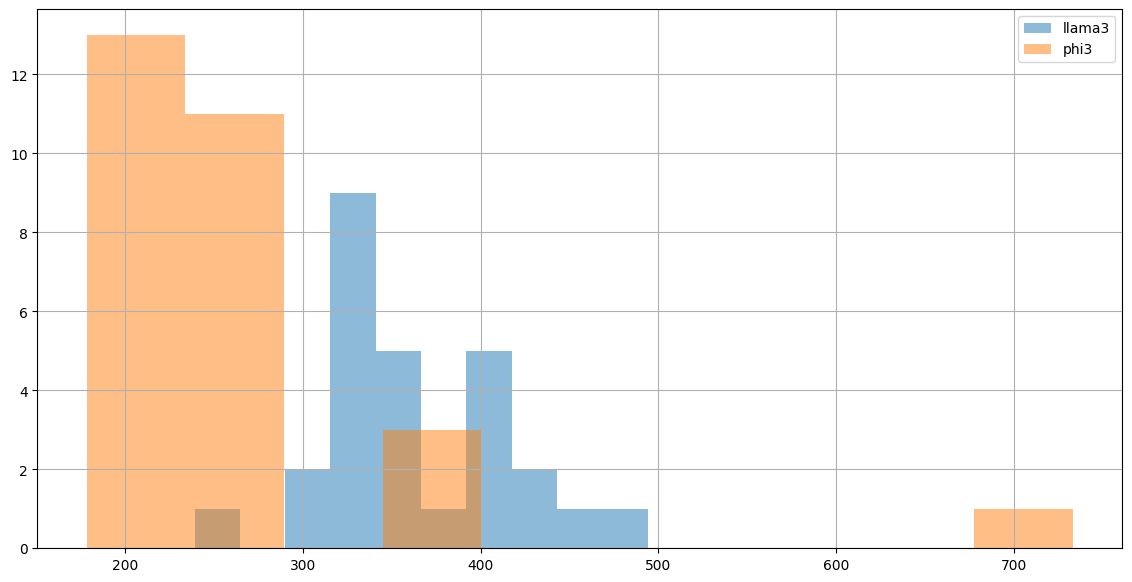

In [31]:
plt.figure(figsize=(14, 7))
for model, group in jan_2017.groupby('model'):
    group['time'].hist(label=model, alpha=0.5)
plt.legend()
plt.show()

In [37]:
# Count none values in the whole dataframe
print(jan_2017.isnull().sum())

pdf              0
mm_yyyy          0
company          4
amount           3
currency         3
adjudicadora     1
tipo             0
tramitacion      4
procedimiento    4
model            0
time             0
dtype: int64


In [38]:
# Count none values depending on model
print(jan_2017.groupby('model').apply(lambda x: x.isnull().sum()))

        pdf  mm_yyyy  company  amount  currency  adjudicadora  tipo  \
model                                                                 
llama3    0        0        4       3         3             1     0   
phi3      0        0        0       0         0             0     0   

        tramitacion  procedimiento  model  time  
model                                            
llama3            2              2      0     0  
phi3              2              2      0     0  


/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_38270/599295365.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(jan_2017.groupby('model').apply(lambda x: x.isnull().sum()))


In [39]:
# Add a new columns which is the number of none values in the row
jan_2017['num_nulls'] = jan_2017.isnull().sum(axis=1)

In [43]:
jan_2017.head()

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time,num_nulls
0,BOE-B-2017-3514.pdf,01-2017,Alavés Montajes y Realización S.L.,1016400.00,euros,Agència Valenciana del Turisme,Contrato Mixto,Urgente,Negociado sin publicidad,llama3,404.64,0
1,BOE-B-2017-240.pdf,01-2017,International Business Machines S.A. (I.B.M.),3921166.68,euros,Diputación Foral de Álava,Contrato de suministro,Anticipada,Negociado sin publicidad por razones de exclus...,llama3,411.99,0
2,BOE-B-2017-2859.pdf,01-2017,Integra Mantenimiento Gestión y Servicios Inte...,440618.45,euros,Ayuntamiento de Madrid. Área de Gobierno de Eq...,Servicios,Ordinaria,Abierto,llama3,352.15,0
3,BOE-B-2017-470.pdf,01-2017,Teknoservice S.L.,1011150.00,euros,Consejería de Educación y Universidades del Go...,Suministro,Ordinaria,Abierto,llama3,368.93,0
4,BOE-B-2017-4174.pdf,01-2017,Econocom Osiatis S.A.,360000.00,euros,Ayuntamiento de Vitoria-Gasteiz,Servicio,Normal,Abierto,llama3,414.85,0


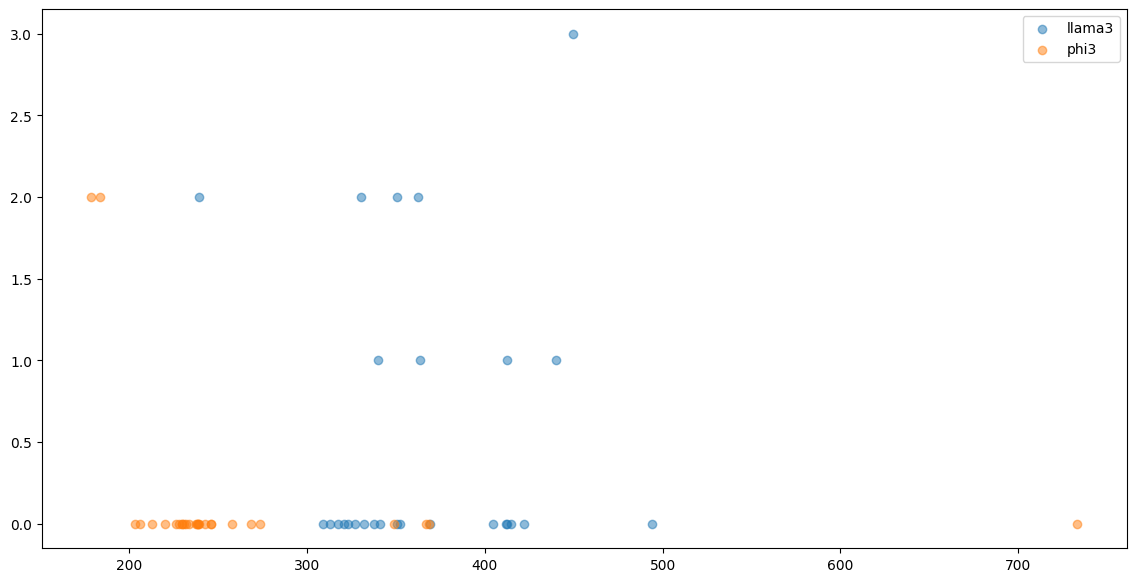

In [41]:
# Scatter plot of time vs num_nulls colored by model
plt.figure(figsize=(14, 7))
for model, group in jan_2017.groupby('model'):
    plt.scatter(group['time'], group['num_nulls'], label=model, alpha=0.5)
plt.legend()
plt.show()

Llama3 Model Summary:
                             OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                 0.0001004
Date:                Fri, 28 Jun 2024   Prob (F-statistic):              0.992
Time:                        17:34:50   Log-Likelihood:                -145.79
No. Observations:                  27   AIC:                             295.6
Df Residuals:                      25   BIC:                             298.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.3715     12.

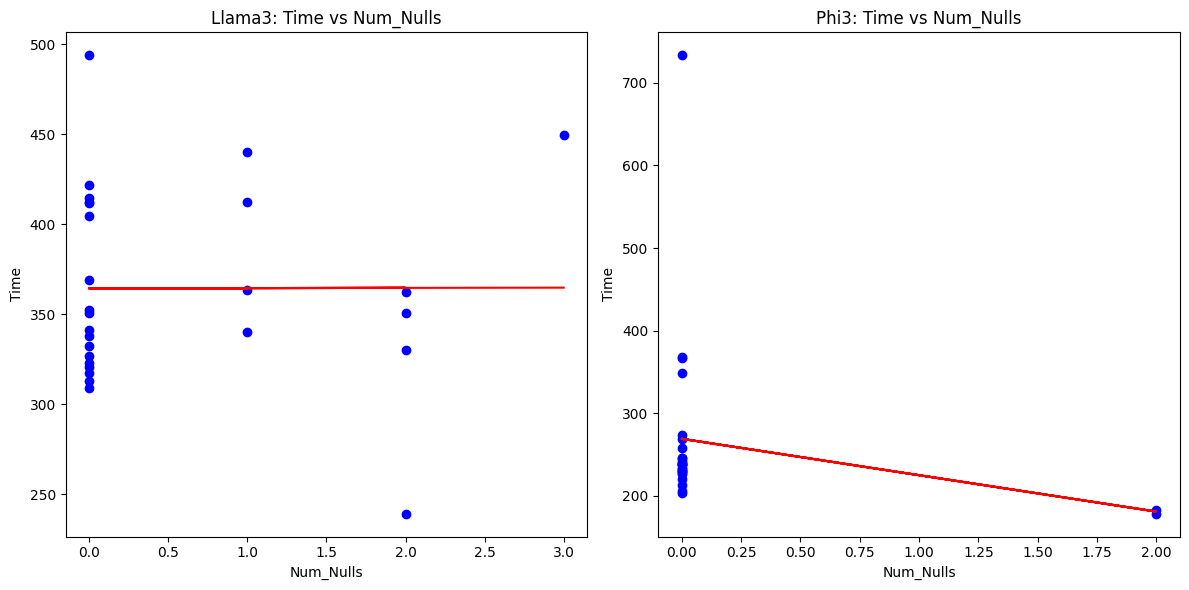

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming the DataFrame is loaded in a variable called df
# df = pd.read_csv('your_file.csv') # Load your data here

# Separate the data by model
llama3_data = jan_2017[jan_2017['model'] == 'llama3']
phi3_data = jan_2017[jan_2017['model'] == 'phi3']

# Define a function to perform linear regression
def linear_regression(data, x_col, y_col):
    X = data[x_col]
    Y = data[y_col]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(Y, X).fit()
    return model

# Perform regression for llama3
llama3_model = linear_regression(llama3_data, 'num_nulls', 'time')
print("Llama3 Model Summary:\n", llama3_model.summary())

# Perform regression for phi3
phi3_model = linear_regression(phi3_data, 'num_nulls', 'time')
print("Phi3 Model Summary:\n", phi3_model.summary())

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for llama3
plt.subplot(1, 2, 1)
plt.scatter(llama3_data['num_nulls'], llama3_data['time'], color='blue')
plt.plot(llama3_data['num_nulls'], llama3_model.predict(sm.add_constant(llama3_data['num_nulls'])), color='red')
plt.title('Llama3: Time vs Num_Nulls')
plt.xlabel('Num_Nulls')
plt.ylabel('Time')

# Plot for phi3
plt.subplot(1, 2, 2)
plt.scatter(phi3_data['num_nulls'], phi3_data['time'], color='blue')
plt.plot(phi3_data['num_nulls'], phi3_model.predict(sm.add_constant(phi3_data['num_nulls'])), color='red')
plt.title('Phi3: Time vs Num_Nulls')
plt.xlabel('Num_Nulls')
plt.ylabel('Time')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from collections import defaultdict

def levenshtein_distance(a, b):
    """
    Calculates the Levenshtein distance between two strings.
    """
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def normalize_string(name):
    """
    Normalizes a string by stripping leading/trailing spaces
    and converting to lowercase.
    """
    return str(name).strip().lower()

def find_representative(names):
    """
    Finds a representative name for a group of similar names.
    """
    # For simplicity, we can choose the first name in the list as the representative
    return names[0]

def standardize_strings(df, column_name='company', distance_threshold=3):
    """
    Standardizes company names in the DataFrame, considering case insensitivity,
    leading/trailing spaces, and allowing for up to three character differences.
    """
    normalized_names = df[column_name].apply(normalize_string)
    unique_names = normalized_names.unique()
    
    # Create a mapping from normalized name to a representative name
    representative_map = {}
    for name in unique_names:
        found = False
        for rep in representative_map:
            if levenshtein_distance(name, rep) <= distance_threshold:
                representative_map[name] = representative_map[rep]
                found = True
                break
        if not found:
            representative_map[name] = name
    
    # Map the original names to their representatives
    standardized_names = normalized_names.map(representative_map)
    
    # Replace the original column with standardized names
    df[column_name] = standardized_names
    
    return df

# Example usage
data = {
    'company': ['Junta de Andalucia', 'La Junta de andalucia', 'ACME Corporation', 'AcmeCor', 'Beta LLC', 'beta llc', 'Gamma Inc.']
}
df = pd.DataFrame(data)

standardized_df = standardize_strings(df)
print(standardized_df)


              company
0  junta de andalucia
1  junta de andalucia
2    acme corporation
3             acmecor
4            beta llc
5            beta llc
6          gamma inc.
